# EE6222 Machine Vision Assignment

- Author: Htun Htet Myat
- Student No: G2401886E


## Table of Contents
1. Introduction
2. Data Preprocessing
3. Dimensionality Reduction
    - Principal Component Analysis (PCA)
    - Linear Discriminant Analysis (LDA)
4. Classification
    - K-Nearest Neighbors (KNN)
5. Evaluation
    - Accuracy Score
6. Conclusion

# The data is imported from KAGGLE - https://www.kaggle.com/datasets/krishd123/high-dimensional-datascape/data

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [123]:
# Load the data
df = pd.read_csv(r'./data/all_data.csv') ## [5 rows x 537 columns]
print(df.head())
df.describe()

   Unnamed: 0  Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0   -0.000133    0.000262    0.001099    0.001834    0.002109    0.002223   
1   -0.000842   -0.001011   -0.001071   -0.000944   -0.000794   -0.000610   
2   -0.000766   -0.000535    0.000162    0.000898    0.001287    0.001582   
3   -0.000301   -0.000377   -0.000451   -0.000529   -0.000685   -0.000845   
4   -0.000589   -0.000857   -0.001135   -0.001171   -0.001128   -0.001039   

   Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  ...  Unnamed: 527  \
0    0.002233    0.002036    0.001582    0.000969  ...       0.82953   
1   -0.000445   -0.000173    0.000077    0.000285  ...       0.84335   
2    0.001704    0.001659    0.001574    0.001438  ...       0.87413   
3   -0.000899   -0.000822   -0.000550   -0.000182  ...       0.85467   
4   -0.000959   -0.000937   -0.000916   -0.000819  ...       0.82978   

   Unnamed: 528  Unnamed: 529  Unnamed: 530  Unnamed: 531  Unnamed: 532  \
0        2.9079        3.7557

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 527,Unnamed: 528,Unnamed: 529,Unnamed: 530,Unnamed: 531,Unnamed: 532,Unnamed: 533,Unnamed: 534,Unnamed: 535,Label
count,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,...,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000
mean,-0.000450,-0.000537,-0.000542,-0.000417,-0.000302,-0.000170,-0.000037,0.000106,0.000245,0.000386,...,0.819352,2.938924,3.653258,1.273790,1.352274,0.555809,0.732155,2.257363,2.059283,0.500000
std,0.001384,0.002011,0.003154,0.003986,0.004287,0.004390,0.004398,0.004345,0.004188,0.003843,...,0.038490,0.370594,0.288674,0.097245,0.380520,0.203178,0.131298,0.422864,0.755169,0.501091
min,-0.004177,-0.005409,-0.006209,-0.006735,-0.007215,-0.007269,-0.007207,-0.006973,-0.006872,-0.007872,...,0.625560,2.029600,2.730500,0.976600,0.366410,0.190470,0.370820,1.043800,0.324510,0.000000
25%,-0.001160,-0.001518,-0.002534,-0.003125,-0.003293,-0.003024,-0.003123,-0.003025,-0.002653,-0.002091,...,0.800610,2.685950,3.500250,1.205475,1.136700,0.386217,0.670595,2.074500,1.584000,0.000000
50%,-0.000793,-0.000933,-0.001141,-0.001402,-0.001455,-0.001362,-0.001301,-0.001233,-0.000990,-0.000699,...,0.828050,2.974600,3.704900,1.280400,1.494050,0.626250,0.784095,2.374000,2.339200,0.500000
75%,-0.000309,-0.000405,0.000426,0.001461,0.001823,0.002050,0.002232,0.002437,0.002413,0.002085,...,0.845147,3.255175,3.864650,1.340225,1.635325,0.732407,0.824523,2.564900,2.664500,1.000000
max,0.006799,0.008477,0.010620,0.013078,0.013870,0.013917,0.013374,0.013197,0.013135,0.012108,...,0.893140,3.796500,4.289600,1.514100,1.956000,0.834510,0.898160,2.991500,2.991500,1.000000


In [124]:
# Split the data into features and labels
x = df.drop('Label', axis=1)
y = df['Label']
print(x.head())


   Unnamed: 0  Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0   -0.000133    0.000262    0.001099    0.001834    0.002109    0.002223   
1   -0.000842   -0.001011   -0.001071   -0.000944   -0.000794   -0.000610   
2   -0.000766   -0.000535    0.000162    0.000898    0.001287    0.001582   
3   -0.000301   -0.000377   -0.000451   -0.000529   -0.000685   -0.000845   
4   -0.000589   -0.000857   -0.001135   -0.001171   -0.001128   -0.001039   

   Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  ...  Unnamed: 526  \
0    0.002233    0.002036    0.001582    0.000969  ...       0.77763   
1   -0.000445   -0.000173    0.000077    0.000285  ...       0.79771   
2    0.001704    0.001659    0.001574    0.001438  ...       0.79716   
3   -0.000899   -0.000822   -0.000550   -0.000182  ...       0.82714   
4   -0.000959   -0.000937   -0.000916   -0.000819  ...       0.87298   

   Unnamed: 527  Unnamed: 528  Unnamed: 529  Unnamed: 530  Unnamed: 531  \
0       0.82953        2.9079

In [125]:
print(y.head())
print(y.unique())

# # y has only 2 classes
# # for the assignment, lets try 6 classes. so we will randomly assign the classes to the data
# # Assign random classes to the data
# y = np.random.randint(0, 6, y.shape[0])

0    0
1    0
2    0
3    0
4    0
Name: Label, dtype: int64
[0 1]


In [126]:

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=216 # 216 is the seed, my birthday..
)
## [5 rows x 537 columns]
## 0.2 is the test size, 80% of the data is used for training and 20% for testing.
## TOTAL TEST SIZE = 0.2 * 537 = 107.4

In [127]:
# PCA calculation from the sklearn PCA
pca = PCA()
pca.fit(X_train)
variance = np.cumsum(pca.explained_variance_ratio_)
optimal_components = np.argmax(variance >= 0.95) + 1
print(f'Optimal number of components: {optimal_components}')

Optimal number of components: 3


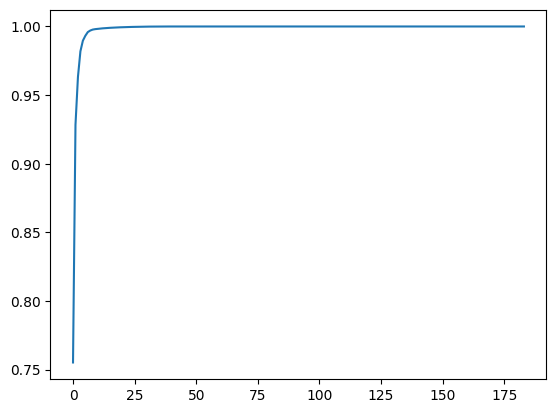

In [128]:
# Anyway, let's plot the variance
plt.plot(variance)

In [129]:
def mahalanobis_distance(x, mean, cov):
    diff = x - mean
    inv_cov = np.linalg.pinv(cov)  # Use pseudoinverse for stability
    dist = np.sqrt(diff @ inv_cov @ diff.T)
    return dist

def fit(x, y):
    """
    Computes the mean vector and covariance matrix for each class.
    If a class has only one sample, the covariance is regularized.
    """
    y = np.array(y)
    classes = np.unique(y)
    means = {}
    covs = {}
    for c in classes:
        x_cls = x[y == c]  # Data points for class c
        means[c] = np.mean(x_cls, axis=0)
        cov = np.cov(x_cls, rowvar=False)
        # Ensure covariance matrix is at least 2D:
        cov = np.atleast_2d(cov)
        # If there's only one sample, np.cov may return a scalar.
        # Optionally add a small regularization for numerical stability:
        reg = 1e-6 * np.eye(cov.shape[0])
        covs[c] = cov + reg
    return means, covs, classes

def predict(X, means, covs, classes):
    """
    Predicts class labels using Mahalanobis distance to each class distribution.
    """
    y_pred = []
    for x in X:
        distances = []
        for c in classes:
            dist = mahalanobis_distance(x, means[c], covs[c])
            distances.append(dist)
        # Pick class with smallest distance
        y_pred.append(classes[np.argmin(distances)])
    return np.array(y_pred)


In [130]:

# For the sake of learning, perform PCA with components {2,3,4,5,10,30}
results_pca = {}
pca_dimensions = range(1,50)

for dim in pca_dimensions:
    pca = PCA(n_components=dim)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    # (A) KNN
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_pca, y_train)
    y_pred_knn = knn.predict(X_test_pca)
    acc_knn = accuracy_score(y_test, y_pred_knn)
    
    # (B) Linear Classifier (Logistic Regression)
    log_reg = LogisticRegression()
    log_reg.fit(X_train_pca, y_train)
    y_pred_log_reg = log_reg.predict(X_test_pca)
    acc_log_reg = accuracy_score(y_test, y_pred_log_reg)
    
    # (C) Mahalanobis Classifier
    means, covs, classes = fit(X_train_pca, y_train)
    y_pred_maha = predict(X_test_pca, means, covs, classes)
    acc_maha = accuracy_score(y_test, y_pred_maha)

    # Store results
    results_pca[dim] = {
        'KNN': acc_knn,
        'LogisticRegression': acc_log_reg,
        'Mahalanobis': acc_maha
    }


In [131]:
num_classes = len(np.unique(y_train)) # ONly have 2 classes for the LDA. 
print(f'Number of classes: {num_classes}') 
lda_dimensions = range(1, num_classes)  # e.g., 1 to C-1
results_lda = {}

for dim in lda_dimensions:
    lda = LinearDiscriminantAnalysis(n_components=dim)
    X_train_lda = lda.fit_transform(X_train, y_train)
    X_test_lda = lda.transform(X_test)
    
    # (A) KNN
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_lda, y_train)
    y_pred_knn = knn.predict(X_test_lda)
    acc_knn = accuracy_score(y_test, y_pred_knn)
    
    # (B) Linear Classifier
    log_reg = LogisticRegression()
    log_reg.fit(X_train_lda, y_train)
    y_pred_log_reg = log_reg.predict(X_test_lda)
    acc_log_reg = accuracy_score(y_test, y_pred_log_reg)
    
    # (C) Mahalanobis Classifier
    means, covs, classes = fit(X_train_lda, y_train)
    y_pred_maha = predict(X_test_lda, means, covs, classes)
    acc_maha = accuracy_score(y_test, y_pred_maha)

    results_lda[dim] = {
        'KNN': acc_knn,
        'LogisticRegression': acc_log_reg,
        'Mahalanobis': acc_maha
    }

Number of classes: 2


In [132]:
print("PCA Results:")
for dim, scores in results_pca.items():
    print(f"  Dimensions: {dim}")
    for clf_name, acc in scores.items():
        print(f"    {clf_name} Accuracy: {acc:.4f}")

print("\nLDA Results:")
for dim, scores in results_lda.items():
    print(f"  Dimensions: {dim}")
    for clf_name, acc in scores.items():
        print(f"    {clf_name} Accuracy: {acc:.4f}")

PCA Results:
  Dimensions: 1
    KNN Accuracy: 0.8261
    LogisticRegression Accuracy: 0.7609
    Mahalanobis Accuracy: 0.7609
  Dimensions: 2
    KNN Accuracy: 0.9130
    LogisticRegression Accuracy: 0.8696
    Mahalanobis Accuracy: 0.8261
  Dimensions: 3
    KNN Accuracy: 0.9130
    LogisticRegression Accuracy: 0.8696
    Mahalanobis Accuracy: 0.8478
  Dimensions: 4
    KNN Accuracy: 0.9130
    LogisticRegression Accuracy: 0.9130
    Mahalanobis Accuracy: 0.8696
  Dimensions: 5
    KNN Accuracy: 0.9130
    LogisticRegression Accuracy: 0.9348
    Mahalanobis Accuracy: 0.9130
  Dimensions: 6
    KNN Accuracy: 0.9130
    LogisticRegression Accuracy: 0.9348
    Mahalanobis Accuracy: 0.8913
  Dimensions: 7
    KNN Accuracy: 0.9130
    LogisticRegression Accuracy: 0.9348
    Mahalanobis Accuracy: 0.9130
  Dimensions: 8
    KNN Accuracy: 0.9130
    LogisticRegression Accuracy: 0.9348
    Mahalanobis Accuracy: 0.9130
  Dimensions: 9
    KNN Accuracy: 0.9130
    LogisticRegression Accuracy: 0

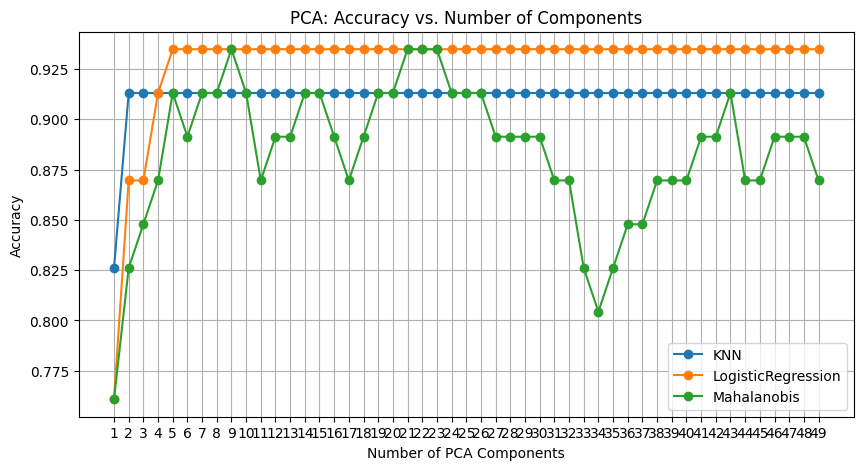

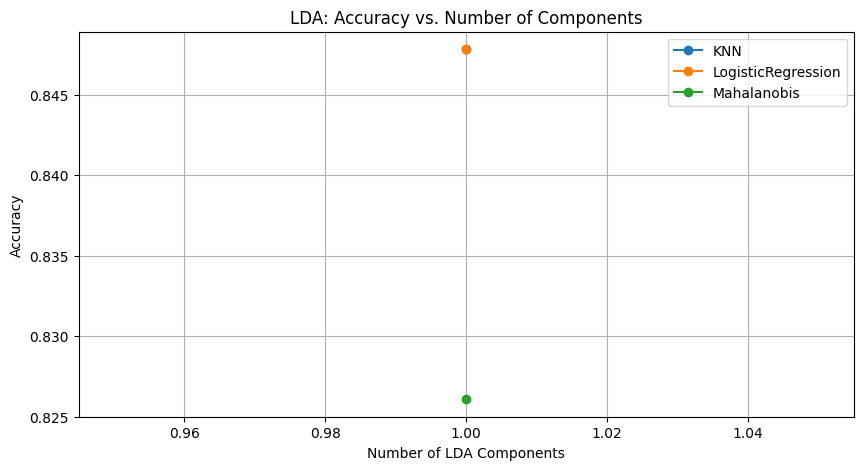

In [133]:
pca_dims = sorted(results_pca.keys())

plt.figure(figsize=(10, 5))
for clf_name in ['KNN', 'LogisticRegression', 'Mahalanobis']:
    # Collect accuracies for this classifier at each PCA dimension
    accuracies = [results_pca[d][clf_name] for d in pca_dims]
    plt.plot(pca_dims, accuracies, marker='o', label=clf_name)
min_val = int(np.floor(min(pca_dims)))
max_val = int(np.ceil(max(pca_dims)))
plt.xticks(np.arange(min_val, max_val + 1, 1))
plt.title('PCA: Accuracy vs. Number of Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.show()

# -- LDA Plot --
lda_dims = sorted(results_lda.keys())

plt.figure(figsize=(10, 5))
for clf_name in ['KNN', 'LogisticRegression', 'Mahalanobis']:
    # Collect accuracies for this classifier at each LDA dimension
    accuracies = [results_lda[d][clf_name] for d in lda_dims]
    plt.plot(lda_dims, accuracies, marker='o', label=clf_name)

plt.title('LDA: Accuracy vs. Number of Components')
plt.xlabel('Number of LDA Components')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()